# LangSmith Walkthrough 기초예제
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## Reference : https://python.langchain.com/v0.1/docs/langsmith/walkthrough/

LangChain은 LLM 어플리케이션 및 에이전트를 빠르게 프로토타입할 수 있게 합니다. 그러나 LLM 애플리케이션을 실제 운영 환경에 배포하는 것은 생각보다 어려울 수 있습니다. 고품질의 제품을 만들기 위해서는 프롬프트, 체인, 기타 구성 요소를 반복적으로 개선해야 합니다.

**LangSmith**는 **LLM 어플리케이션을 디버그하고, 테스트하고, 지속적으로 개선하는 작업을 쉽게** 만들어줍니다.

이 기능이 유용할 때는 다음과 같은 경우입니다:

*   새로운 체인, 에이전트, 또는 도구 세트를 신속하게 디버그하고 싶을 때
*   파인튜닝, few-shot 프롬프트 및 평가를 위한 데이터셋을 생성 및 관리할 때
*   어플리케이션에 대해 회귀 테스트를 실행하여 신뢰성있게 개발할 때
*   제품에 관한 인사이트를 도출하고 지속적인 개선을 위해 운영 분석을 캡처할 때



















# Prerequisites

LangSmith 계정을 만들고 API 키를 생성하세요 ( https://smith.langchain.com/ ). 도큐먼트( https://docs.smith.langchain.com/ )를 통해 플랫폼을 익혀보세요.

참고로 **LangSmith는 현재 클로즈드 베타 상태**입니다. 더 많은 사용자에게 제공하기 위해 롤아웃 중이지만, 웹사이트에서 양식을 작성하면 빠른 액세스를 받을 수 있습니다.

자, 이제 시작해봅시다!

# Log runs to LangSmith

먼저, LangChain이 추적 기록을 로그하도록 환경 변수를 설정하세요. 이를 위해 **LANGCHAIN_TRACING_V2** 환경 변수를 true로 설정합니다. **LANGCHAIN_PROJECT** 환경 변수를 설정하여 LangChain이 어느 프로젝트에 로그를 남길지 지정할 수 있습니다 (이 변수가 설정되지 않으면 default 프로젝트에 실행 기록이 로그됩니다). 이 프로젝트가 존재하지 않으면 자동으로 생성됩니다. 또한, **LANGCHAIN_ENDPOINT**와 **LANGCHAIN_API_KEY** 환경 변수도 설정해야 합니다.

# 라이브러리 설치

In [ ]:
!pip install --upgrade --quiet  langchain langsmith langchainhub
!pip install --upgrade --quiet  langchain-openai tiktoken pandas duckduckgo-search
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.6/973.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.4/310.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resol

In [ ]:
import os
from uuid import uuid4

unique_id = uuid4().hex[0:8]
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"Tracing Walkthrough - {unique_id}"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "여러분의_LANGCHAIN_API_KEY"

# Used by the agent in this tutorial
os.environ["OPENAI_API_KEY"] = "여러분의_OPENAI_API_KEY"

API와 상호작용하기 위한 langsmith 클라이언트를 생성하세요.

In [ ]:
from langsmith import Client

client = Client()

LangChain 컴포넌트를 생성하고 플랫폼에 실행 로그를 기록하세요. 이 예제에서는 일반 검색 도구(DuckDuckGo)에 액세스할 수 있는 에이전트를 생성할 것입니다. 에이전트의 프롬프트는 허브( https://smith.langchain.com/hub/wfh/langsmith-agent-prompt )에서 확인할 수 있습니다.

In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_openai import ChatOpenAI

# Fetches the latest version of this prompt
prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")

llm = ChatOpenAI(
    model="gpt-3.5-turbo-16k",
    temperature=0,
)

tools = [
    DuckDuckGoSearchResults(
        name="duck_duck_go"
    ),  # General internet search using DuckDuckGo
]

llm_with_tools = llm.bind_tools(tools)

runnable_agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

agent_executor = AgentExecutor(
    agent=runnable_agent, tools=tools, handle_parsing_errors=True
)

In [ ]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'wfh', 'lc_hub_repo': 'langsmith-agent-prompt', 'lc_hub_commit_hash': '5d466cbc8466b1157dc921acb77125a564ae99e712fcde28f550f657149d32ea'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(variable_name='agent_scratchpad')])

우리는 지연 시간을 줄이기 위해 여러 입력에 대해 에이전트를 동시에 실행하고 있습니다. 실행은 백그라운드에서 LangSmith에 기록되므로 실행 지연에는 영향을 미치지 않습니다.

In [ ]:
inputs = [
    "What is LangChain?",
    "What's LangSmith?",
    "When was Llama-v2 released?",
    "What is the langsmith cookbook?",
    "When did langchain first announce the hub?",
]

results = agent_executor.batch([{"input": x} for x in inputs], return_exceptions=True)

In [ ]:
results[:2]

[{'input': 'What is LangChain?',
  'output': 'I\'m sorry, but I couldn\'t find any information about "LangChain". Could you please provide more context or clarify your question?'},
 {'input': "What's LangSmith?",
  'output': 'I\'m sorry, but I couldn\'t find any information about "LangSmith". It could be a company, a product, or a person. Can you provide more context or details about what you are referring to?'}]

환경 설정이 성공적으로 완료되었다면, 에이전트 추적 기록이 앱의 프로젝트 섹션에 표시될 것입니다. 축하합니다!

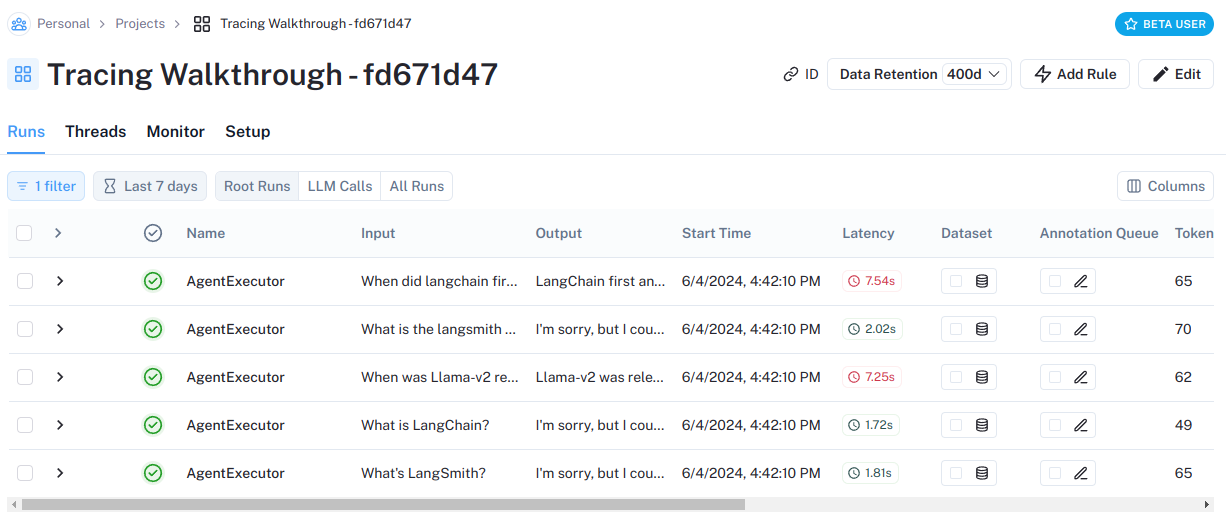

에이전트가 도구를 효과적으로 사용하지 않는 것 같습니다. 이를 평가하여 기준선(baseline)을 설정해 보겠습니다.

# Evaluate Agent

LangSmith는 실행 로그 기록 외에도 LLM 애플리케이션 테스트 및 평가(test and evaluate)를 지원합니다.

이 절에서는 LangSmith를 활용하여 벤치마크 데이터셋을 생성하고 에이전트에 대해 AI 지원 평가기(evaluators)를 실행하는 방법을 몇 단계로 안내합니다.



1.   데이터셋 생성
2.   벤치마킹할 새 에이전트를 초기화합니다.
3.   에이전트의 출력을 평가하는 평가기(evaluators)를 구성합니다.
4.   데이터셋을 대상으로 에이전트를 실행하고 결과를 평가합니다.





# 1. Create a LangSmith dataset

아래에서는 LangSmith 클라이언트를 사용하여 위의 입력 질문과 레이블을 가진 데이터셋을 생성합니다. 나중에 이 데이터셋을 사용하여 새로운 에이전트의 성능을 측정할 것입니다. 데이터셋은 예제의 모음으로, 이는 응용 프로그램의 테스트 케이스로 사용할 수 있는 입력-출력 쌍에 불과합니다.

데이터셋에 대한 더 자세한 정보, CSV 또는 기타 파일에서 데이터셋을 생성하는 방법, 또는 플랫폼에서 데이터셋을 생성하는 방법에 대해서는 LangSmith 문서 ( https://docs.smith.langchain.com/ )를 참조하십시오.

In [ ]:
outputs = [
    "LangChain is an open-source framework for building applications using large language models. It is also the name of the company building LangSmith.",
    "LangSmith is a unified platform for debugging, testing, and monitoring language model applications and agents powered by LangChain",
    "July 18, 2023",
    "The langsmith cookbook is a github repository containing detailed examples of how to use LangSmith to debug, evaluate, and monitor large language model-powered applications.",
    "September 5, 2023",
]

In [ ]:
dataset_name = f"agent-qa-{unique_id}"

dataset = client.create_dataset(
    dataset_name,
    description="An example dataset of questions over the LangSmith documentation.",
)

client.create_examples(
    inputs=[{"input": query} for query in inputs],
    outputs=[{"output": answer} for answer in outputs],
    dataset_id=dataset.id,
)

# 2. Initialize a new agent to benchmark

LangSmith는 LLM, 체인, 에이전트 또는 사용자 정의 함수를 평가할 수 있게 해줍니다. 대화형 에이전트는 상태를 유지하므로(메모리가 있음) 데이터셋 실행 간에 이 상태가 공유되지 않도록 하기 위해 각 호출에 대해 chain_factory(즉, constructor) 함수를 전달합니다.

이 경우 OpenAI의 function calling 엔드포인트를 사용하는 에이전트를 테스트할 것입니다.








In [ ]:
from langchain import hub
from langchain.agents import AgentExecutor, AgentType, initialize_agent, load_tools
from langchain_openai import ChatOpenAI


# Since chains can be stateful (e.g. they can have memory), we provide
# a way to initialize a new chain for each row in the dataset. This is done
# by passing in a factory function that returns a new chain for each row.
def create_agent(prompt, llm_with_tools):
    runnable_agent = (
        {
            "input": lambda x: x["input"],
            "agent_scratchpad": lambda x: format_to_openai_tool_messages(
                x["intermediate_steps"]
            ),
        }
        | prompt
        | llm_with_tools
        | OpenAIToolsAgentOutputParser()
    )
    return AgentExecutor(agent=runnable_agent, tools=tools, handle_parsing_errors=True)

# 3. Configure evaluation

체인의 결과를 UI에서 수동으로 비교하는 것은 효과적이지만 시간이 많이 소요될 수 있습니다. 자동화된 메트릭과 AI 지원 피드백을 사용하여 구성 요소의 성능을 평가하는 것이 도움이 될 수 있습니다.

아래에서는 휴리스틱 평가를 기록하는 사용자 정의 실행 평가자를 만들 것입니다.

**Heuristic evaluators**

In [ ]:
from langsmith.evaluation import EvaluationResult
from langsmith.schemas import Example, Run


def check_not_idk(run: Run, example: Example):
    """Illustration of a custom evaluator."""
    agent_response = run.outputs["output"]
    if "don't know" in agent_response or "not sure" in agent_response:
        score = 0
    else:
        score = 1
    # You can access the dataset labels in example.outputs[key]
    # You can also access the model inputs in run.inputs[key]
    return EvaluationResult(
        key="not_uncertain",
        score=score,
    )

**Batch Evaluators**

일부 메트릭은 개별 실행/예제에 할당되지 않고 전체 "테스트"에 대해 집계됩니다. 이는 Precision, Recall, AUC와 같은 일반적인 분류 메트릭일 수도 있고, 다른 사용자 정의 집계 메트릭일 수도 있습니다.

Runs(시스템 추적) 목록과 Examples(데이터셋 기록) 목록을 받는 함수(또는 호출 가능한 객체)를 정의함으로써 전체 테스트 수준에서 배치 메트릭을 정의할 수 있습니다.













In [ ]:
from typing import List


def max_pred_length(runs: List[Run], examples: List[Example]):
    predictions = [len(run.outputs["output"]) for run in runs]
    return EvaluationResult(key="max_pred_length", score=max(predictions))

아래에서는 위에서 만든 사용자 정의 평가자와 다음과 같은 사전 구현된 실행 평가자를 사용하여 평가를 구성할 것입니다:

*   결과를 정답 레이블과 비교합니다.
*   임베딩 거리(embedding distance)를 사용하여 의미론적 (비)유사성을 측정합니다.
*   사용자 정의 기준을 사용하여 참조 없이 에이전트 응답의 '측면'(aspects)을 평가합니다.

적절한 평가자를 선택하는 방법과 사용자 정의 평가자를 만드는 방법에 대한 자세한 논의는 LangSmith 문서 ( https://docs.smith.langchain.com/ )를 참조하십시오.








In [ ]:
from langchain.evaluation import EvaluatorType
from langchain.smith import RunEvalConfig

evaluation_config = RunEvalConfig(
    # Evaluators can either be an evaluator type (e.g., "qa", "criteria", "embedding_distance", etc.) or a configuration for that evaluator
    evaluators=[
        check_not_idk,
        # Measures whether a QA response is "Correct", based on a reference answer
        # You can also select via the raw string "qa"
        EvaluatorType.QA,
        # Measure the embedding distance between the output and the reference answer
        # Equivalent to: EvalConfig.EmbeddingDistance(embeddings=OpenAIEmbeddings())
        EvaluatorType.EMBEDDING_DISTANCE,
        # Grade whether the output satisfies the stated criteria.
        # You can select a default one such as "helpfulness" or provide your own.
        RunEvalConfig.LabeledCriteria("helpfulness"),
        # The LabeledScoreString evaluator outputs a score on a scale from 1-10.
        # You can use default criteria or write our own rubric
        RunEvalConfig.LabeledScoreString(
            {
                "accuracy": """
Score 1: The answer is completely unrelated to the reference.
Score 3: The answer has minor relevance but does not align with the reference.
Score 5: The answer has moderate relevance but contains inaccuracies.
Score 7: The answer aligns with the reference but has minor errors or omissions.
Score 10: The answer is completely accurate and aligns perfectly with the reference."""
            },
            normalize_by=10,
        ),
    ],
    batch_evaluators=[max_pred_length],
)

# 4. Run the agent and evaluators

모델을 평가하려면 run_on_dataset(또는 비동기 arun_on_dataset) 함수를 사용하세요. 이 함수는 다음과 같은 작업을 수행합니다:

1.   지정된 데이터셋에서 예제 행을 가져옵니다.
2.   각 예제에 대해 에이전트(또는 사용자 정의 함수)를 실행합니다.
3.   결과 실행 추적과 해당 참조 예제에 평가자를 적용하여 자동화된 피드백을 생성합니다.


결과는 LangSmith 앱에서 확인할 수 있습니다.

In [ ]:
from langchain import hub

# We will test this version of the prompt
prompt = hub.pull("wfh/langsmith-agent-prompt:798e7324")

In [ ]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'wfh', 'lc_hub_repo': 'langsmith-agent-prompt', 'lc_hub_commit_hash': '798e7324a5d88aab3d56e7e0de6ade17e5535b2c5f01e73bda45ee42fb25839f'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are an expert senior software engineer. You are responsible for answering questions about LangChain. Use functions to consult the documentation before answering.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(variable_name='agent_scratchpad')])

In [ ]:
import functools

from langchain.smith import arun_on_dataset, run_on_dataset

chain_results = run_on_dataset(
    dataset_name=dataset_name,
    llm_or_chain_factory=functools.partial(
        create_agent, prompt=prompt, llm_with_tools=llm_with_tools
    ),
    evaluation=evaluation_config,
    verbose=True,
    client=client,
    project_name=f"tools-agent-test-5d466cbc-{unique_id}",
    # Project metadata communicates the experiment parameters,
    # Useful for reviewing the test results
    project_metadata={
        "env": "testing-notebook",
        "model": "gpt-3.5-turbo",
        "prompt": "5d466cbc",
    },
)

# Sometimes, the agent will error due to parsing issues, incompatible tool inputs, etc.
# These are logged as warnings here and captured as errors in the tracing UI.

View the evaluation results for project 'tools-agent-test-5d466cbc-f822d18f' at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4/compare?selectedSessions=c57342ea-fa70-4931-b8b8-9824b0f6ae85

View all tests for Dataset agent-qa-f822d18f at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4
[------------------------------------------------->] 5/5
 Experiment Results:
        feedback.not_uncertain  feedback.correctness  feedback.embedding_cosine_distance  feedback.helpfulness  feedback.score_string:accuracy error  execution_time                                run_id
count                     5.00                  5.00                                5.00                  5.00                            5.00     0            5.00                                     5
unique                     NaN                   NaN                                 NaN         

# Review the test results

출력에 있는 URL을 클릭하거나 LangSmith의 "Testing & Datasets" 페이지에서 **"agent-qa-{unique_id}"** 데이터셋으로 이동하여 테스트 결과 추적 UI를 검토할 수 있습니다.

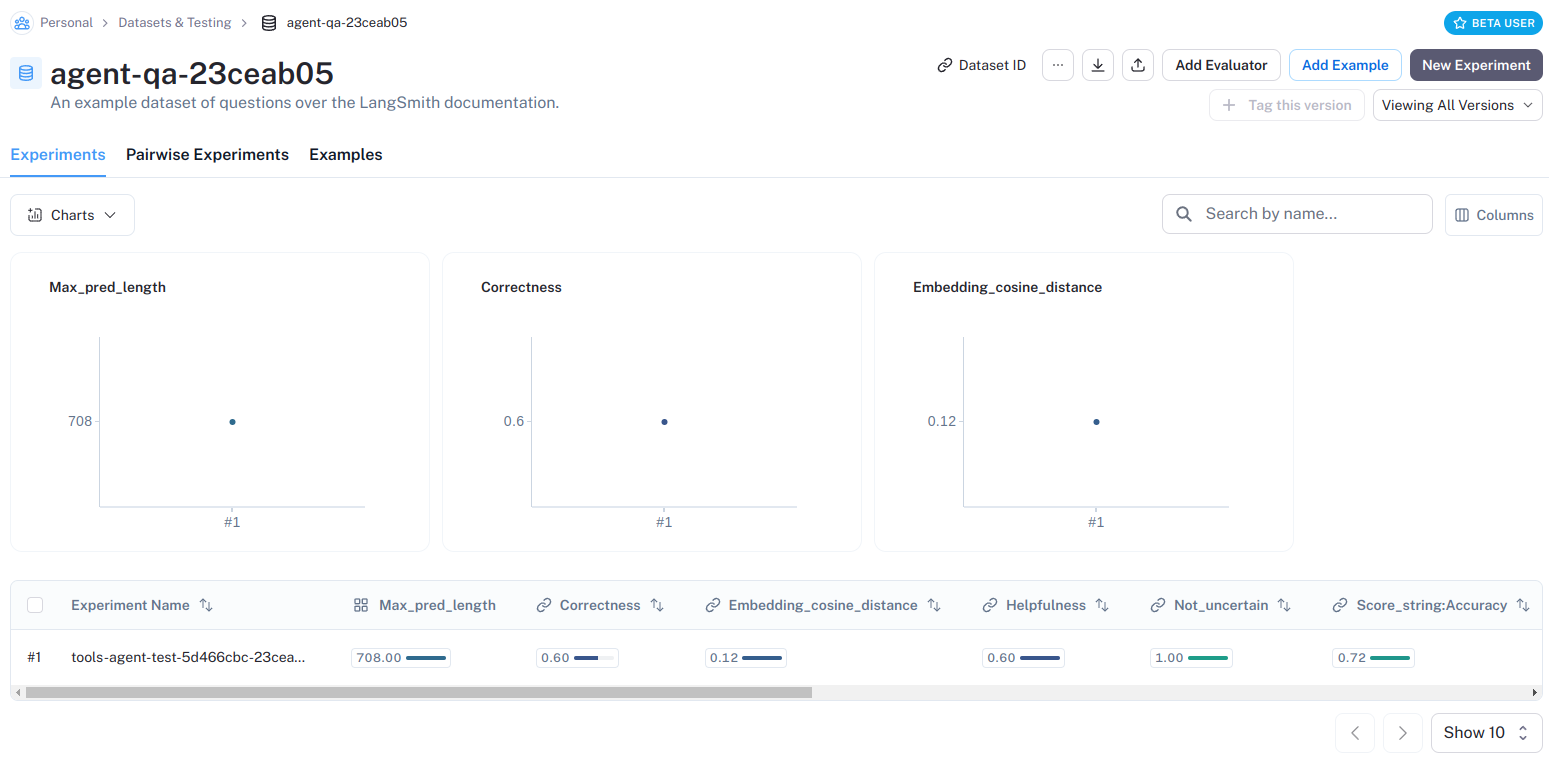

이렇게 하면 선택한 평가자로부터 기록된 새로운 실행 결과와 피드백이 표시됩니다. 또한 아래의 표 형식으로 요약된 결과를 확인할 수도 있습니다.








In [ ]:
chain_results.to_dataframe()

,inputs.input,outputs.input,outputs.output,reference.output,feedback.not_uncertain,feedback.correctness,feedback.embedding_cosine_distance,feedback.helpfulness,feedback.score_string:accuracy,error,execution_time,run_id
b2c7c710-4190-49b9-8d73-118bf2d5f8d2,What is LangChain?,What is LangChain?,LangChain is a decentralized blockchain platfo...,LangChain is an open-source framework for buil...,1,0,0.092569,0,0.1,None,1.828096,8b9ef7ab-dacf-4eee-bf4c-addaf44a34c9
a00fb00d-138b-401b-95b8-62f12f738935,What's LangSmith?,What's LangSmith?,LangSmith is a platform developed by LangChain...,"LangSmith is a unified platform for debugging,...",1,1,0.057816,1,1.0,None,4.465045,55d92a5c-7bf6-4efe-8170-099f350158cb
2f15bef0-20c4-46c6-91ee-4b7f4b3a6e4a,When was Llama-v2 released?,When was Llama-v2 released?,Llama-v2 was released in July 2023.,"July 18, 2023",1,1,0.163679,1,1.0,None,2.954979,ab0461e2-00da-4887-bd87-5a4d1ce7afd9
eea0549f-dfa6-4912-9bae-960a1eb77d6a,What is the langsmith cookbook?,What is the langsmith cookbook?,The LangSmith Cookbook is a repository that se...,The langsmith cookbook is a github repository ...,1,1,0.042554,1,1.0,None,4.408155,104f29f8-9c85-4a59-afe7-ef6937a1b582
af4e5457-0526-44bd-a2c8-e504af2b44c4,When did langchain first announce the hub?,When did langchain first announce the hub?,LangChain first announced the LangChain Hub a ...,"September 5, 2023",1,0,0.279939,0,0.3,None,3.101050,951f8150-314a-46ae-acd8-81fdaeb60b60


# (Optional) Compare to another prompt

이제 테스트 실행 결과를 얻었으니, 에이전트에 변경을 가하고 벤치마킹할 수 있습니다. 다른 프롬프트로 다시 시도해보고 결과를 확인해봅시다.

In [ ]:
candidate_prompt = hub.pull("wfh/langsmith-agent-prompt:39f3bbd0")

chain_results = run_on_dataset(
    dataset_name=dataset_name,
    llm_or_chain_factory=functools.partial(
        create_agent, prompt=candidate_prompt, llm_with_tools=llm_with_tools
    ),
    evaluation=evaluation_config,
    verbose=True,
    client=client,
    project_name=f"tools-agent-test-39f3bbd0-{unique_id}",
    project_metadata={
        "env": "testing-notebook",
        "model": "gpt-3.5-turbo",
        "prompt": "39f3bbd0",
    },
)

View the evaluation results for project 'tools-agent-test-39f3bbd0-f822d18f' at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4/compare?selectedSessions=110e312b-3c79-4709-abf0-22cc55905857

View all tests for Dataset agent-qa-f822d18f at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4
[------------------------------------------------->] 5/5
 Experiment Results:
        feedback.not_uncertain  feedback.correctness  feedback.embedding_cosine_distance  feedback.helpfulness  feedback.score_string:accuracy error  execution_time                                run_id
count                     5.00                  5.00                                5.00                  5.00                            5.00     0            5.00                                     5
unique                     NaN                   NaN                                 NaN         

In [ ]:
candidate_prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'wfh', 'lc_hub_repo': 'langsmith-agent-prompt', 'lc_hub_commit_hash': '39f3bbd09dc148e58457332eb78abf42107de10196fe4e37f0132195f0dd48a6'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful AI assistant. Your memory is out-dated, so search the web using the functions provided before answering. \n__arg1 != arg1')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(variable_name='agent_scratchpad')])

In [ ]:
not_proper_prompt = hub.pull("wfh/langsmith-agent-prompt:5d466cbc")

chain_results = run_on_dataset(
    dataset_name=dataset_name,
    llm_or_chain_factory=functools.partial(
        create_agent, prompt=not_proper_prompt, llm_with_tools=llm_with_tools
    ),
    evaluation=evaluation_config,
    verbose=True,
    client=client,
    project_name=f"tools-agent-test-5d466cbc-{unique_id}-2",
    project_metadata={
        "env": "testing-notebook",
        "model": "gpt-3.5-turbo",
        "prompt": "5d466cbc",
    },
)

View the evaluation results for project 'tools-agent-test-5d466cbc-f822d18f-2' at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4/compare?selectedSessions=7a008a10-0720-441d-9a58-f985c818d4fc

View all tests for Dataset agent-qa-f822d18f at:
https://smith.langchain.com/o/2da4358c-aaa8-5f93-b4af-fa2d78b96bd8/datasets/131f2789-a916-4ea5-9ddb-50dd1435dec4
[------------------------------------------------->] 5/5
 Experiment Results:
        feedback.not_uncertain  feedback.correctness  feedback.embedding_cosine_distance  feedback.helpfulness  feedback.score_string:accuracy error  execution_time                                run_id
count                     5.00                  5.00                                5.00                  5.00                            5.00     0            5.00                                     5
unique                     NaN                   NaN                                 NaN       

In [ ]:
not_proper_prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'wfh', 'lc_hub_repo': 'langsmith-agent-prompt', 'lc_hub_commit_hash': '5d466cbc8466b1157dc921acb77125a564ae99e712fcde28f550f657149d32ea'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(variable_name='agent_scratchpad')])

# Conclusion

축하합니다! LangSmith를 사용하여 에이전트를 추적하고 평가하는 데 성공하셨습니다!

이것은 시작하기 위한 간단한 가이드였지만, LangSmith를 사용하여 개발자 작업 흐름을 가속화하고 더 나은 결과를 도출할 수 있는 더 많은 방법이 있습니다.

LangSmith를 최대한 활용하는 방법에 대한 자세한 내용은 LangSmith 문서를 참조하세요. ( https://docs.smith.langchain.com/ )






